# MiniTensor Tensor & Functional API Tour

This notebook demonstrates the full public tensor/functional API surface in MiniTensor, including creation utilities, reshaping/indexing helpers, math/reduction operations, and visualization with Matplotlib.


In [1]:
import minitensor as mt
import numpy as np
import matplotlib.pyplot as plt

mt.manual_seed(42)
np.random.seed(42)


## Tensor creation & dtype/device utilities

In [2]:
numpy_base = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float32)
shared_base = np.array([[10, 11], [12, 13]], dtype=np.float32)

creations = {
    "zeros": mt.zeros(2, 3),
    "ones": mt.ones(2, 3),
    "empty": mt.empty(2, 3),
    "rand": mt.rand(2, 3),
    "randn": mt.randn(2, 3),
    "truncated_normal": mt.truncated_normal(2, 3),
    "randint": mt.randint(0, 10, (2, 3)),
    "randperm": mt.randperm(6),
    "eye": mt.eye(3),
    "full": mt.full((2, 3), 7.5),
    "uniform": mt.uniform((2, 3), low=-1.0, high=1.0),
    "xavier_uniform": mt.xavier_uniform((2, 3)),
    "xavier_normal": mt.xavier_normal((2, 3)),
    "he_uniform": mt.he_uniform((2, 3)),
    "he_normal": mt.he_normal((2, 3)),
    "lecun_uniform": mt.lecun_uniform((2, 3)),
    "lecun_normal": mt.lecun_normal((2, 3)),
    "linspace": mt.linspace(0.0, 1.0, 5),
    "logspace": mt.logspace(0.0, 2.0, 4),
    "arange": mt.arange(0, 6),
    "from_numpy": mt.from_numpy(numpy_base),
    "from_numpy_shared": mt.from_numpy_shared(shared_base),
    "as_tensor": mt.as_tensor([1, 2, 3]),
}

for name, tensor in creations.items():
    print(f"{name:>18}: shape={tensor.shape}, dtype={tensor.dtype}, device={tensor.device}")

print()
print("Default dtype:", mt.get_default_dtype())
with mt.default_dtype("float64"):
    float64_tensor = mt.ones(2, 2)
    print("float64 tensor dtype:", float64_tensor.dtype)


             zeros: shape=Shape([2, 3]), dtype=float32, device=cpu
              ones: shape=Shape([2, 3]), dtype=float32, device=cpu
             empty: shape=Shape([2, 3]), dtype=float32, device=cpu
              rand: shape=Shape([2, 3]), dtype=float32, device=cpu
             randn: shape=Shape([2, 3]), dtype=float32, device=cpu
  truncated_normal: shape=Shape([2, 3]), dtype=float32, device=cpu
           randint: shape=Shape([2, 3]), dtype=int64, device=cpu
          randperm: shape=Shape([6]), dtype=int64, device=cpu
               eye: shape=Shape([3, 3]), dtype=float32, device=cpu
              full: shape=Shape([2, 3]), dtype=float32, device=cpu
           uniform: shape=Shape([2, 3]), dtype=float32, device=cpu
    xavier_uniform: shape=Shape([2, 3]), dtype=float32, device=cpu
     xavier_normal: shape=Shape([2, 3]), dtype=float32, device=cpu
        he_uniform: shape=Shape([2, 3]), dtype=float32, device=cpu
         he_normal: shape=Shape([2, 3]), dtype=float32, device=cpu
  

## Tensor metadata & basic arithmetic

In [3]:
a = mt.arange(0, 6).reshape(2, 3)
b = mt.ones(2, 3)

print("a:", a)
print("shape:", a.shape, "ndim:", a.ndim, "numel:", a.numel())
print("nbytes:", a.nbytes, "itemsize:", a.itemsize, "strides:", a.strides)
print("is_contiguous:", a.is_contiguous(), "requires_grad:", a.requires_grad)

print("add:", a + b)
print("sub:", a - b)
print("mul:", a * 2)
print("div:", a / 2)
print("pow:", a.pow(2))
print("matmul:", a.matmul(b.transpose(0, 1)))


a: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
shape: Shape([2, 3]) ndim: <built-in method ndim of minitensor._core.Tensor object at 0x7fd182e6e550> numel: 6
nbytes: 24 itemsize: 4 strides: (3, 1)
is_contiguous: True requires_grad: False
add: tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
sub: tensor([[-1.0, 0.0, 1.0], [2.0, 3.0, 4.0]])
mul: tensor([[0.0, 2.0, 4.0], [6.0, 8.0, 10.0]])
div: tensor([[0.0, 0.5, 1.0], [1.5, 2.0, 2.5]])
pow: tensor([[0.0, 1.0, 4.0], [9.0, 16.0, 25.0]])
matmul: tensor([[3.0, 3.0], [12.0, 12.0]])


## Reshaping, indexing, and layout utilities

In [4]:
print("reshape:", a.reshape(3, 2))
print("view:", a.view(3, 2))
print("flatten:", a.flatten())
print("ravel:", a.ravel())
print("transpose:", a.transpose(0, 1))
print("permute:", a.permute(1, 0))
print("movedim:", a.movedim(0, 1))
print("moveaxis:", a.moveaxis(0, 1))
print("swapaxes:", a.swapaxes(0, 1))
print("swapdims:", a.swapdims(0, 1))
print("squeeze:", a.unsqueeze(0).squeeze())
print("unsqueeze shape:", a.unsqueeze(0).shape)
print("expand shape:", a.unsqueeze(0).expand(2, 2, 3).shape)
print("repeat shape:", a.unsqueeze(0).repeat(2, 1, 1).shape)
print("repeat_interleave:", a.repeat_interleave(2, dim=1))
print("flip:", a.flip(1))
print("roll:", a.roll(1, dims=1))

print("cat:", mt.cat([a, a], dim=0))
print("stack:", mt.stack([a, a], dim=0))
print("split:", mt.split(a, 1, dim=1))
print("chunk:", mt.chunk(a, 3, dim=1))
print("split_with_sections:", a.split_with_sections([1, 2], 1))
print("narrow:", mt.narrow(a, 1, 0, 2))
print("index_select:", mt.index_select(a, 1, [0, 2]))
print("gather:", mt.gather(a, 1, mt.tensor([[0, 2, 1], [2, 1, 0]]).astype("int64")))
print("topk:", mt.topk(a, 2, dim=1))
print("sort:", mt.sort(a, dim=1))
print("argsort:", mt.argsort(a, dim=1))
print("diagonal:", mt.diagonal(a))
print("trace:", mt.trace(mt.eye(3)))
print("triu:")
print(mt.triu(mt.ones(3, 3)))
print("tril:")
print(mt.tril(mt.ones(3, 3)))
print("solve:")
print(mt.solve(mt.eye(2), mt.ones(2, 1)))
print("bmm:")
print(mt.bmm(mt.ones(2, 2, 2), mt.ones(2, 2, 2)))
print("dot:", mt.dot(mt.tensor([1.0, 2.0]), mt.tensor([3.0, 4.0])))


reshape: tensor([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])
view: tensor([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])
flatten: tensor([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
ravel: tensor([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
transpose: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
permute: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
movedim: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
moveaxis: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
swapaxes: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
swapdims: tensor([[0.0, 3.0], [1.0, 4.0], [2.0, 5.0]])
squeeze: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
unsqueeze shape: Shape([1, 2, 3])
expand shape: Shape([2, 2, 3])
repeat shape: Shape([2, 2, 3])
repeat_interleave: tensor([[0.0, 0.0, 1.0, 1.0, 2.0, 2.0], [3.0, 3.0, 4.0, 4.0, 5.0, 5.0]])
flip: tensor([[2.0, 1.0, 0.0], [5.0, 4.0, 3.0]])
roll: tensor([[2.0, 0.0, 1.0], [5.0, 3.0, 4.0]])
cat: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
stack: tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]], [

## Math, reductions, and comparisons

In [5]:
float_a = a.astype("float32")
mask = mt.tensor([[1, 0, 1], [0, 1, 1]]).astype("bool")

print("abs:", (-float_a).abs())
print("exp:", float_a.exp())
print("log:", (float_a + 1).log())
print("log1p:", float_a.log1p())
print("expm1:", float_a.expm1())
print("sqrt:", (float_a + 1).sqrt())
print("rsqrt:", mt.rsqrt(mt.ones(2, 2)))
print("reciprocal:", mt.reciprocal(mt.ones(2, 2)))
print("sign:", mt.sign(mt.tensor([-1.0, 0.0, 2.0])))
print("sin:", mt.sin(float_a))
print("cos:", mt.cos(float_a))
print("tan:", mt.tan(float_a))
print("asin:", mt.asin(mt.tensor([0.0, 0.5])))
print("acos:", mt.acos(mt.tensor([0.0, 0.5])))
print("atan:", mt.atan(mt.tensor([0.0, 0.5])))
print("sinh:", mt.sinh(mt.tensor([0.0, 0.5])))
print("cosh:", mt.cosh(mt.tensor([0.0, 0.5])))
print("tanh:", mt.tensor([0.0, 0.5]).tanh())
print("asinh:", mt.asinh(mt.tensor([0.0, 0.5])))
print("acosh:", mt.acosh(mt.tensor([1.0, 1.5])))
print("atanh:", mt.atanh(mt.tensor([0.0, 0.5])))

print("sum:", float_a.sum())
print("mean:", float_a.mean())
print("prod:", float_a.prod())
print("max:", float_a.max())
print("min:", float_a.min())
print("std:", float_a.std())
print("var:", float_a.var())
print("median:", mt.median(float_a))
print("quantile:", mt.quantile(float_a, 0.5))
print("nanquantile:", mt.nanquantile(float_a, 0.5))
print("nansum:", mt.nansum(float_a))
print("nanmean:", mt.nanmean(float_a))
print("nanmax:", mt.nanmax(float_a))
print("nanmin:", mt.nanmin(float_a))
print("logsumexp:", mt.logsumexp(float_a, dim=1))

print("softmax:", mt.softmax(float_a, dim=1))
print("log_softmax:", mt.log_softmax(float_a, dim=1))
print("softsign:", mt.softsign(float_a))
print("masked_softmax:", mt.masked_softmax(float_a, mask, dim=1))
print("masked_log_softmax:", mt.masked_log_softmax(float_a, mask, dim=1))

print("clip:", mt.clip(float_a, 1, 3))
print("clamp:", float_a.clamp(1, 3))
print("clamp_min:", mt.clamp_min(float_a, 1.5))
print("clamp_max:", mt.clamp_max(float_a, 2.5))
print("round:", mt.round(float_a + 0.6))
print("floor:", mt.floor(float_a + 0.6))
print("ceil:", mt.ceil(float_a + 0.2))

print("eq:", float_a.eq(float_a))
print("ne:", float_a.ne(float_a + 1))
print("lt:", float_a.lt(2))
print("le:", float_a.le(2))
print("gt:", float_a.gt(2))
print("ge:", float_a.ge(2))
print("all:", float_a.gt(-1).all())
print("any:", float_a.gt(2).any())
print("allclose:", float_a.allclose(float_a + 1e-5, 1e-5, 1e-5))
print("array_equal:", float_a.array_equal(float_a))
print("isfinite:", float_a.isfinite())
print("isinf:", float_a.isinf())
print("isnan:", float_a.isnan())

print("where:", mt.where(float_a > 2, float_a, mt.zeros_like(float_a)))
print("masked_fill:", float_a.masked_fill(float_a > 3, 99))


abs: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
exp: tensor([[1.0, 2.7182817459106445, 7.389056205749512], [20.08553695678711, 54.598148345947266, 148.4131622314453]])
log: tensor([[0.0, 0.6931471824645996, 1.0986123085021973], [1.3862943649291992, 1.6094379425048828, 1.7917594909667969]])
log1p: tensor([[0.0, 0.6931471824645996, 1.0986123085021973], [1.3862943649291992, 1.6094379425048828, 1.7917594909667969]])
expm1: tensor([[0.0, 1.7182817459106445, 6.389056205749512], [19.08553695678711, 53.59815216064453, 147.4131622314453]])
sqrt: tensor([[1.0, 1.4142135381698608, 1.7320507764816284], [2.0, 2.2360680103302, 2.4494898319244385]])
rsqrt: tensor([[1.0, 1.0], [1.0, 1.0]])
reciprocal: tensor([[1.0, 1.0], [1.0, 1.0]])
sign: tensor([-1.0, 0.0, 1.0])
sin: tensor([[0.0, 0.8414709568023682, 0.9092974066734314], [0.14112000167369843, -0.756802499294281, -0.9589242935180664]])
cos: tensor([[1.0, 0.5403022766113281, -0.416146844625473], [-0.9899924993515015, -0.6536436080932617, 0.28366219997

## Conversions and utility helpers

In [6]:
print("to list:", a.tolist())
print("item:", mt.tensor([42.0]).item())
print("astype float64:", a.astype("float64").dtype)
print("to cpu:", a.to("cpu"))
print("detach:", a.detach())
print("clone:", a.clone())

print("numpy copy:")
print(a.numpy_copy())
print("numpy shared:")
print(a.numpy())


to list: [[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]
item: 42.0
astype float64: float64
to cpu: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
detach: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
clone: tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
numpy copy:
[[0. 1. 2.]
 [3. 4. 5.]]
numpy shared:
[[0. 1. 2.]
 [3. 4. 5.]]


## Visualization with Matplotlib

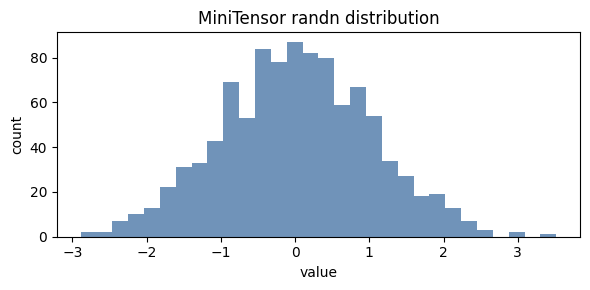

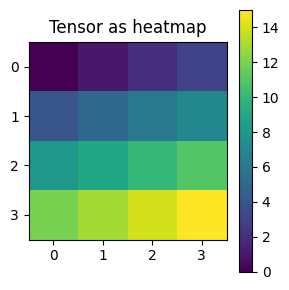

In [7]:
random_samples = mt.randn(1000).numpy_copy()
plt.figure(figsize=(6, 3))
plt.hist(random_samples, bins=30, color="#4c78a8", alpha=0.8)
plt.title("MiniTensor randn distribution")
plt.xlabel("value")
plt.ylabel("count")
plt.tight_layout()
plt.show()

image = mt.arange(0, 16).reshape(4, 4).numpy_copy()
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap="viridis")
plt.title("Tensor as heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()
